In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['A2','A3','A8','A11','A14','A15'],
    categorical_vars = ['A1','A4','A5','A6','A7','A9','A10','A12','A13'],
    class_var = 'class'
)

In [5]:
exp = Experiment('data/credit1.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=5e-3,
                 weight_decay=1e-7,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20,25,30])

In [ ]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10


In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [29]:
%time clf_scores = exp.test_classification_performance(cv=3)

ValueError: Number of features of the model must match the input. Model n_features is 48 and input n_features is 46 

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=5e-3, weight_decay=1e-7, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.37985914945602417
[14, 11, 10, 6, 10, 6]
>>> Epoch = 2, Loss = 0.29397258162498474
[9, 6, 7, 6, 7, 6]
>>> Epoch = 3, Loss = 0.2829228341579437
[9, 10, 12, 6, 7, 6]
>>> Epoch = 4, Loss = 0.2739400863647461
[9, 9, 12, 6, 7, 9]
>>> Epoch = 5, Loss = 0.27479904890060425
[9, 10, 12, 6, 7, 9]
>>> Epoch = 6, Loss = 0.27765440940856934
[9, 10, 12, 5, 9, 9]
0 5
>>> Epoch = 7, Loss = 0.27541545033454895
[9, 8, 12, 5, 9, 9]
0 5
>>> Epoch = 8, Loss = 0.2747069001197815
[9, 8, 10, 5, 7, 9]
0 5
>>> Epoch = 9, Loss = 0.2769785523414612
[9, 8, 10, 2, 7, 9]
0 5
>>> Epoch = 10, Loss = 0.26459524035453796
[9, 8, 12, 5, 7, 9]
0 5
>>> Epoch = 11, Loss = 0.2704695463180542
[9, 8, 10, 5, 7, 9]
1 5
>>> Epoch = 12, Loss = 0.26546889543533325
[9, 8, 10, 2, 7, 9]
1 5
>>> Epoch = 13, Loss = 0.27514228224754333
[9, 15, 10, 2, 7, 9]
0 5
>>> Epoch = 14, Loss = 0.263836532831192
[14, 15, 10, 2, 7, 9]
0 5
>>> Epoch = 15, Loss = 0.26996585726737976
[9, 15, 10, 2, 7, 9]
1 5
>>> Epoch = 16, Loss =

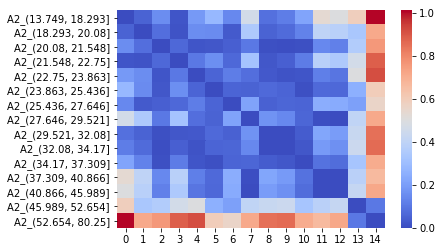

In [5]:
sb.plot_pairwise_distance_between_bins('A2')

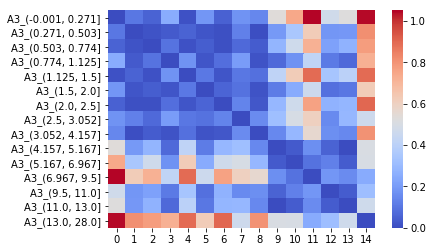

In [6]:
sb.plot_pairwise_distance_between_bins('A3')

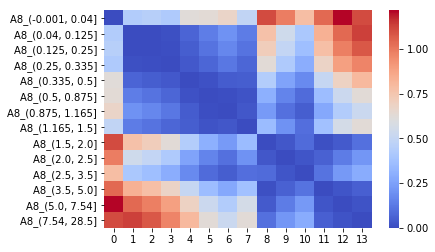

In [7]:
sb.plot_pairwise_distance_between_bins('A8')

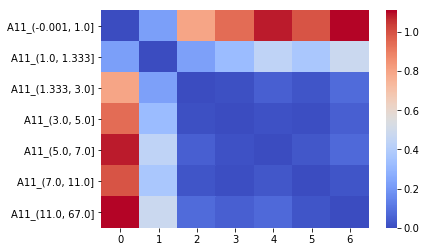

In [8]:
sb.plot_pairwise_distance_between_bins('A11')

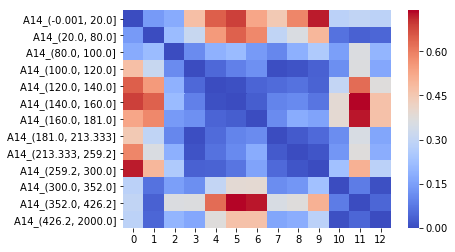

In [9]:
sb.plot_pairwise_distance_between_bins('A14')

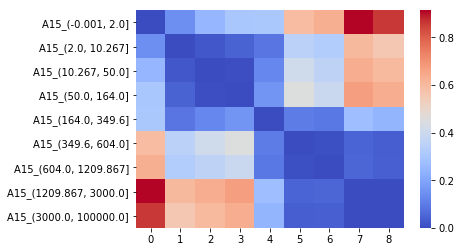

In [10]:
sb.plot_pairwise_distance_between_bins('A15')

In [11]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

A2
['(13.749, 45.989]', '(45.989, 80.25]']
A3
['(-0.001, 4.157]', '(4.157, 6.967]', '(6.967, 9.5]', '(9.5, 13.0]', '(13.0, 28.0]']
A8
['(-0.001, 0.04]', '(0.04, 0.335]', '(0.335, 1.5]', '(1.5, 2.0]', '(2.0, 3.5]', '(3.5, 5.0]', '(5.0, 28.5]']
A11
['(-0.001, 1.333]', '(1.333, 67.0]']
A14
['(-0.001, 80.0]', '(80.0, 300.0]', '(300.0, 2000.0]']
A15
['(-0.001, 2.0]', '(2.0, 164.0]', '(164.0, 349.6]', '(349.6, 1209.867]', '(1209.867, 100000.0]']
